In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [46]:
df = pd.read_csv('winemag-data-130k-v2.csv')
df.head()


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [47]:
def categoriza(df):
    if df == "Argentina":
        return 0;
    elif df =="Spain":
        return 1
    
    
df['country_id'] = df['country'].apply(categoriza)    

In [48]:
df.drop(['Unnamed: 0','description','designation','province','region_1','region_2','taster_twitter_handle','title','variety','winery','taster_name'], axis = 1, inplace = True)

In [49]:
df.isnull().sum()
df.dropna(inplace=True)
df.head()

,country,points,price,country_id
5,Spain,87,15.0,1.0
16,Argentina,87,30.0,0.0
17,Argentina,87,13.0,0.0
18,Spain,87,28.0,1.0
81,Spain,86,16.0,1.0


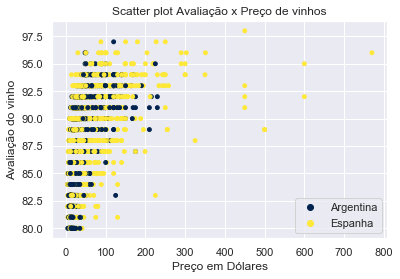

In [50]:
x = df[['price','points']].to_numpy()
z = df['country_id']
y = z.tolist()
model = GaussianNB()
model.fit(x,y)
ax = plt.scatter(x[:,0], x[:,1],c = y , s=15 ,cmap='cividis')
plt.legend(handles=ax.legend_elements()[0], labels = ['Argentina','Espanha'])
plt.xlabel("Preço em Dólares")
plt.ylabel("Avaliação do vinho")
plt.title("Scatter plot Avaliação x Preço de vinhos")
plt.show()

In [59]:
Xnew = [(41,81),(12,90),(15,82),(33,83),(500,90),(350,85),(88,87),(86,84)]
df_bayes = pd.DataFrame(Xnew)
df_bayes.rename(columns={0: "Preço USD", 1: "Nota"},inplace = True)
df_bayes

,Preço USD,Nota
1,41,81
2,12,90
3,15,82
4,33,83
5,500,90
6,350,85
7,88,87
8,86,84


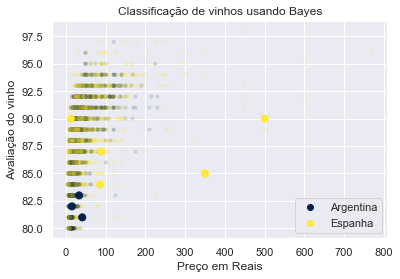

In [61]:
rng = np.random.RandomState(0)
r1 = rng .rand(2000,2)

Xnew = [(41,81),(12,90),(15,82),(33,83),(500,90),(350,85),(88,87),(86,84)]
Ynew = model.predict(Xnew)
Xnew = np.asarray(Xnew)


plt.scatter(x[:,0], x[:,1], c=y, s=10, cmap='cividis',alpha = 0.1)
lim= plt.axis()
plt.scatter(Xnew[:,0],Xnew[:,1], c=Ynew,s = 50,cmap='cividis', alpha=1)
plt.axis(lim)
plt.xlabel("Preço em Reais")
plt.ylabel("Avaliação do vinho")
plt.title("Classificação de vinhos usando Bayes")
plt.legend(handles=ax.legend_elements()[0], labels = ['Argentina','Espanha'])
plt.show()

In [53]:
yprob = model.predict_proba(Xnew)
yprob.round(2)
df = pd.DataFrame(yprob.round(2))
df.rename(columns={0: "Argentina", 1: "Espanha"},inplace = True)
df*100

,Argentina,Espanha
1,53.0,47.0
2,41.0,59.0
3,54.0,46.0
4,51.0,49.0
5,0.0,100.0
6,0.0,100.0
7,8.0,92.0
8,11.0,89.0
